# Clasificación de perros y gatos con CNN

In [ ]:
# Importar librerías
import os
import random
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

### 1. Descargar conjunto de datos

El conjunto de datos que se estará utilizando es el de "Dogs vs Cats".

Se descargara el dataset del enlace y posteriormente se descomprimiran los archivos.

In [ ]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
zip_dir = tf.keras.utils.get_file('cats_and_dogs_filterted.zip', origin=_URL, extract=True)

### 2. Exploración del conjunto de datos

In [ ]:
# Obtener rutas de las carpetas para los datos de entrenamiento y prueba
base_dir = os.path.join(os.path.dirname(zip_dir), 'cats_and_dogs_filtered')
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

In [ ]:
train_cats_dir = os.path.join(train_dir, 'cats')  # Directorio con las imágenes de entrenamiento de gatos
train_dogs_dir = os.path.join(train_dir, 'dogs')  # Directorio con las imégenes de entrenamiento de perros
validation_cats_dir = os.path.join(validation_dir, 'cats')  # Directorio con las imágenes de prueba de gatos
validation_dogs_dir = os.path.join(validation_dir, 'dogs')  # Directorio con las imágenes de prueba de perros

In [ ]:
num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))
print('Número de imágenes de entrenamiento de gatos:', num_cats_tr)
print('Número de imágenes de entrenamiento de perros:', num_dogs_tr)

num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))
print('Número de imágenes de prueba de gatos:', num_cats_val)
print('Número de imágenes de prueba de perros:', num_dogs_val)

Número de imágenes de entrenamiento de gatos: 1000
Número de imágenes de entrenamiento de perros: 1000
Número de imágenes de prueba de gatos: 500
Número de imágenes de prueba de perros: 500


### 3. Preparar los conjunto de datos

Generar mini batches de las imágenes con las transformaciones previamente realizadas

In [ ]:
BATCH_SIZE = 64 # Tamaño del Batch
IMG_SHAPE  = 100 # Tamaño de la imagen

In [ ]:
# Transformaciones con keras (Data Augmentation)
img_generator = ImageDataGenerator(rescale=1./255) # Reescalar imágenes  de 0-255 a 0-1

In [ ]:
#img_generator = ImageDataGenerator(
#    rotation_range=40,
#    width_shift_range=0.2,
#    height_shift_range=0.2,
#    shear_range=0.2,
#    zoom_range=0.2,
#    horizontal_flip=True,
#    fill_mode='nearest')

In [ ]:
train = img_generator.flow_from_directory(batch_size=BATCH_SIZE, #Tamaño del Batch
                                               directory=train_dir, # Directorio del conjunto de datos de entrenamiento
                                               shuffle=True, # Aleatoriza las imágenes
                                               target_size=(IMG_SHAPE,IMG_SHAPE), # Cambiar el tama;o de las imágenes
                                               class_mode='binary') # Set “binary” if you have only two classes to predict

Found 2000 images belonging to 2 classes.


In [ ]:
validation = img_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                 directory=validation_dir,
                                                 target_size=(IMG_SHAPE, IMG_SHAPE),
                                                class_mode='binary')

Found 1000 images belonging to 2 classes.


In [ ]:
img, label = train.next()
print('Tamaño del tensor:', img.shape)
print('Tamaño del tensor:', label.shape)

Tamaño del tensor: (64, 100, 100, 3)
Tamaño del tensor: (64,)


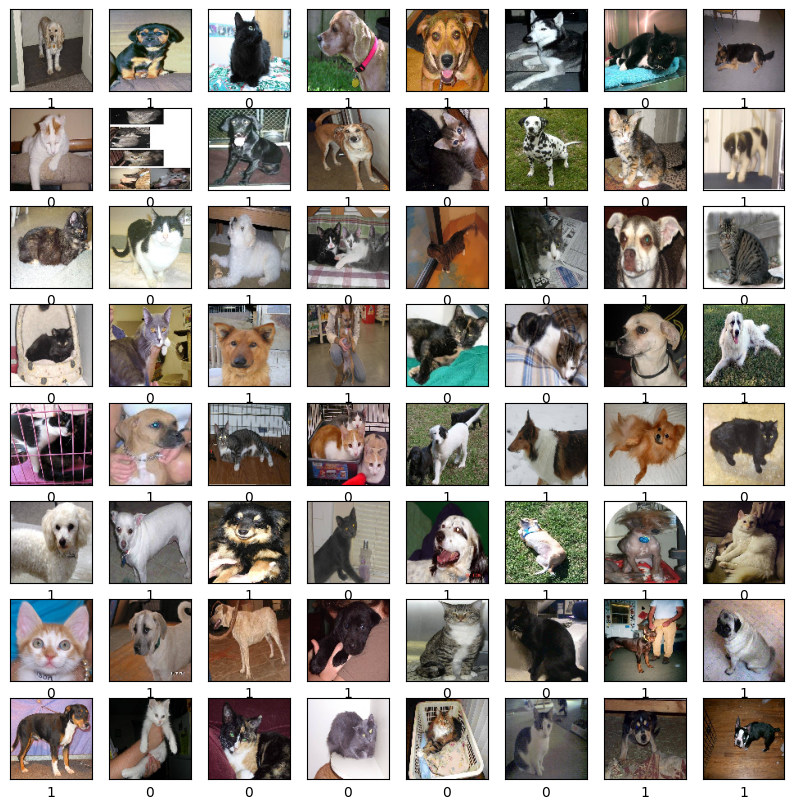

In [ ]:
# Visualizar imágenes de entrenamiento
plt.figure(figsize=(10,10))
for i in range(64):
    plt.subplot(8,8,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(img[i])
    plt.xlabel(int(label[i]))
plt.show()

### 4. Definir la arquitectura del modelo

In [ ]:
def build_model(img_shape):
  model = Sequential([
    Conv2D(16, kernel_size=(3,3), activation='relu', input_shape=(img_shape, img_shape, 3)),
    MaxPooling2D(2, 2),

    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(100, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
  ])

  return model

In [ ]:
model = build_model(IMG_SHAPE)

In [ ]:
# Definir optimizador, función de costo y métrica de clasificación
adam = Adam(learning_rate=0.001)
model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Visualizar arquitectura del modelo
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 98, 98, 16)        448       
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 49, 49, 16)        0         
 ng2D)                                                           
                                                                 
 conv2d_16 (Conv2D)          (None, 47, 47, 32)        4640      
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 23, 23, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_17 (Conv2D)          (None, 21, 21, 64)        18496     
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 10, 10, 64)       

### 5. Entrenar el modelo

In [ ]:
# Early stopping para prevenir overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=3)

In [ ]:
# Definir número de épocas
EPOCHS = 18

In [ ]:
history = model.fit(train, # Datos de entrenamiento
                    epochs=EPOCHS, # Número de épocas
                    validation_data=validation, # Datos de validación
                    callbacks=[early_stop])

Epoch 1/18
32/32 [==============================] - 7s 130ms/step - loss: 0.6902 - accuracy: 0.5325 - val_loss: 0.6708 - val_accuracy: 0.5900
Epoch 2/18
32/32 [==============================] - 4s 126ms/step - loss: 0.6766 - accuracy: 0.5840 - val_loss: 0.6589 - val_accuracy: 0.5690
Epoch 3/18
32/32 [==============================] - 5s 149ms/step - loss: 0.6471 - accuracy: 0.6210 - val_loss: 0.6102 - val_accuracy: 0.6860
Epoch 4/18
32/32 [==============================] - 4s 121ms/step - loss: 0.6090 - accuracy: 0.6690 - val_loss: 0.5774 - val_accuracy: 0.7140
Epoch 5/18
32/32 [==============================] - 4s 128ms/step - loss: 0.5712 - accuracy: 0.6990 - val_loss: 0.5651 - val_accuracy: 0.7180
Epoch 6/18
32/32 [==============================] - 5s 148ms/step - loss: 0.5224 - accuracy: 0.7485 - val_loss: 0.5396 - val_accuracy: 0.7210
Epoch 7/18
32/32 [==============================] - 4s 125ms/step - loss: 0.5010 - accuracy: 0.7550 - val_loss: 0.5242 - val_accuracy: 0.7400
Epoch 

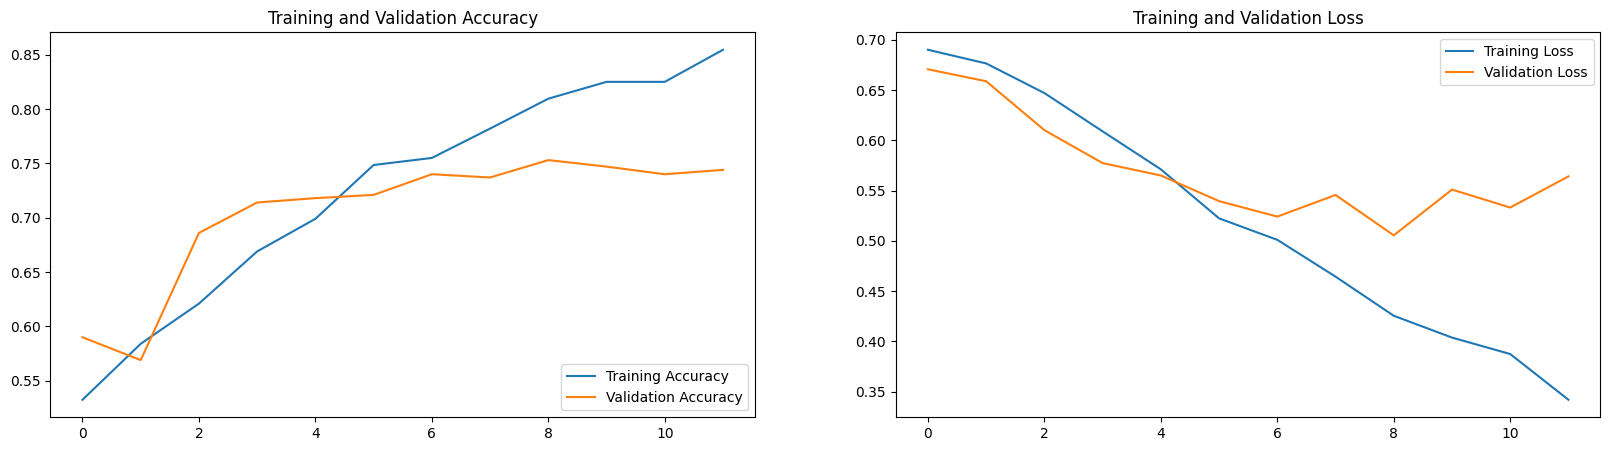

In [ ]:
# Visualizar gráficas de aprendizaje
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = np.arange(len(history.history['loss']))

plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
#plt.savefig('./foo.png')
plt.show()

### 6. Realizar predicciones

In [ ]:
img, label = validation.next()

In [ ]:
y_pred = model.predict(img) # Predicción de imágenes con el modelo entrenado
y_pred_class = ((y_pred > 0.5)+0).ravel() # Asignar etiqueta a predicciones
y_pred_class

2/2 [==============================] - 0s 6ms/step


array([0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1])

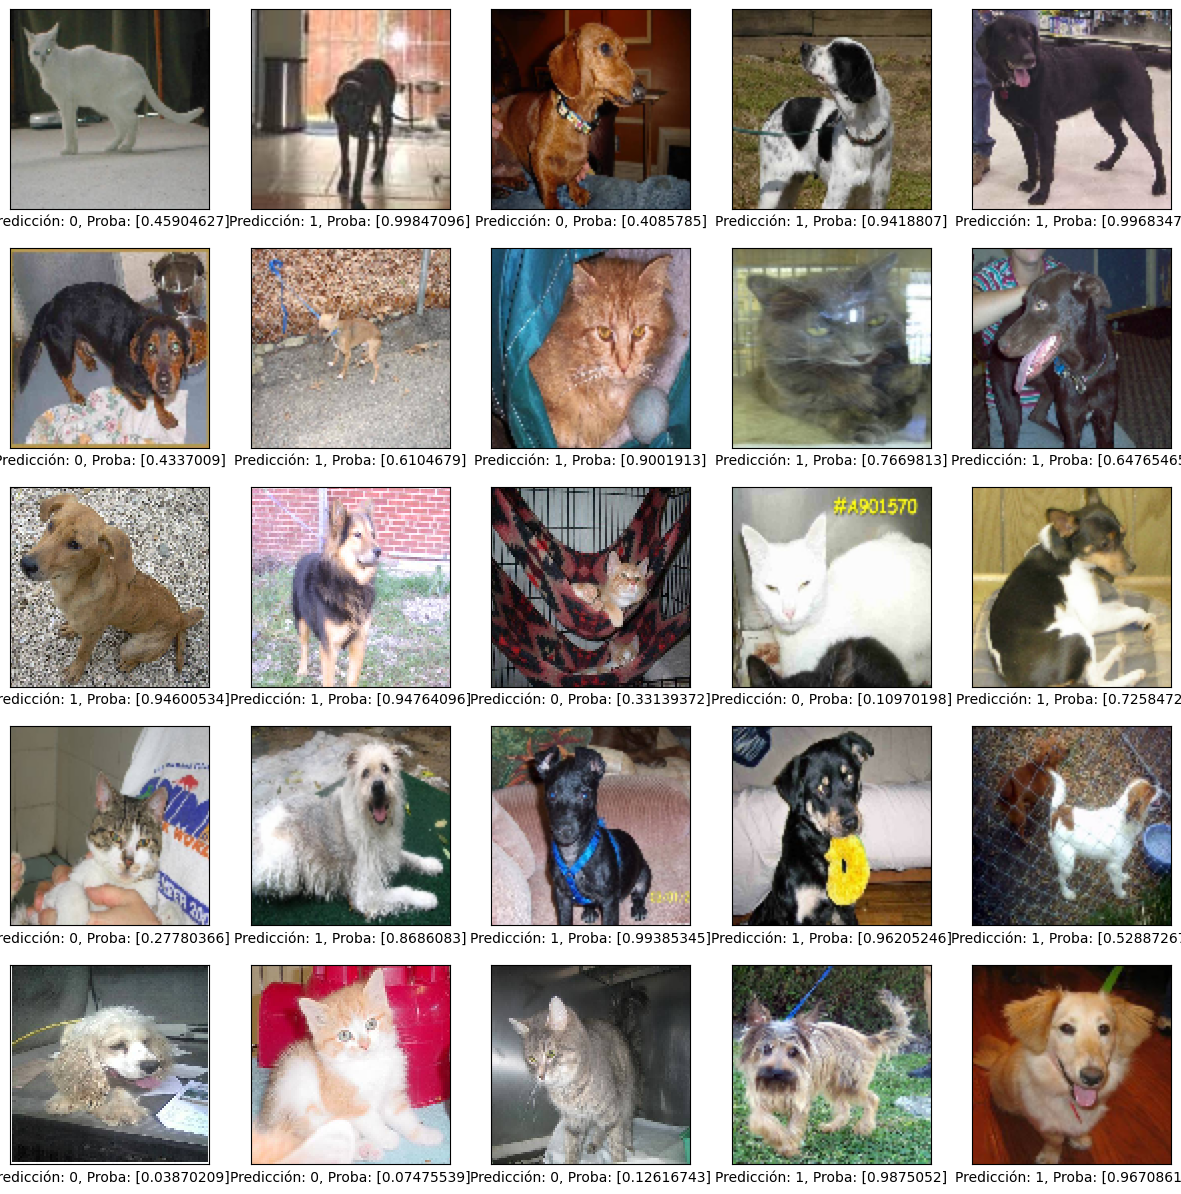

In [ ]:
# Visualización de resultados]
plt.figure(figsize=(15,15))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(img[i])
    plt.xlabel(f'Predicción: {y_pred_class[i]}, Proba: {y_pred[i]}')
plt.show()

# Aumento de Datos

In [1]:
from keras.preprocessing.image import load_img, img_to_array

In [4]:
img = load_img('C:\\Users\\atorr\\OneDrive - Instituto Politecnico Nacional\\Desktop\\perrito.png')  # this is a PIL image
img

FileNotFoundError: ignored

In [ ]:
img_generator_validation =  ImageDataGenerator(
    rescale=1./255)

In [ ]:
img_generator = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [ ]:
train = img_generator.flow_from_directory(batch_size=BATCH_SIZE, #Tamaño del Batch
                                               directory=train_dir, # Directorio del conjunto de datos de entrenamiento
                                               shuffle=True, # Aleatoriza las imágenes
                                               target_size=(IMG_SHAPE,IMG_SHAPE), # Cambiar el tama;o de las imágenes
                                               class_mode='binary') # Set “binary” if you have only two classes to predict

Found 2000 images belonging to 2 classes.


In [ ]:
validation = img_generator_validation.flow_from_directory(batch_size=BATCH_SIZE,
                                                 directory=validation_dir,
                                                 target_size=(IMG_SHAPE, IMG_SHAPE),
                                                class_mode='binary')

Found 1000 images belonging to 2 classes.


In [ ]:
x = img_to_array(img)  # this is a Numpy array with shape (375, 499, 3)
print(x.shape)
x =  np.expand_dims(x, axis=0)
print(x.shape)

In [ ]:
#Creates our batch of one image
pic = generator.flow(x, batch_size =1)
plt.figure(figsize=(15,15))
#Plots our figures
for i in range(1,6):
  plt.subplot(1, 5, i)
  batch = pic.next()
  image_ = batch[0]
  plt.imshow(image_)
  plt.axis('off')
plt.show()

In [ ]:
img, label = train.next()
print('Tamaño del tensor:', img.shape)
print('Tamaño del tensor:', label.shape)

Tamaño del tensor: (64, 100, 100, 3)
Tamaño del tensor: (64,)


In [ ]:
# Probemos con otra arquitectura


In [ ]:
model2 = Sequential()

In [ ]:
model2.add(Conv2D(32, (3, 3), activation='relu',input_shape=(IMG_SHAPE, IMG_SHAPE, 3)))
model2.add(MaxPooling2D((2, 2)))
model2.add(Conv2D(64, (3, 3), activation='relu'))
model2.add(MaxPooling2D((2, 2)))
model2.add(Conv2D(128, (3, 3), activation='relu'))
model2.add(MaxPooling2D((2, 2)))
model2.add(Conv2D(128, (3, 3), activation='relu'))
model2.add(MaxPooling2D((2, 2)))
model2.add(Flatten())
model2.add(Dropout(0.5))
model2.add(Dense(512, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))

In [ ]:
from tensorflow.keras import optimizers

In [ ]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-4),
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255) #todos los pixeles estarán entre 0 y 255
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
for data_batch, labels_batch in train:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (64, 100, 100, 3)
labels batch shape: (64,)


In [ ]:
# Early stopping para prevenir overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=10)

In [ ]:
history = model.fit(train, # Datos de entrenamiento
                    epochs=EPOCHS, # Número de épocas
                    validation_data=validation, # Datos de validación
                    callbacks=[early_stop])

Epoch 1/18
32/32 [==============================] - 11s 355ms/step - loss: 0.5556 - accuracy: 0.7100 - val_loss: 0.5806 - val_accuracy: 0.6880
Epoch 2/18
32/32 [==============================] - 12s 376ms/step - loss: 0.5610 - accuracy: 0.7110 - val_loss: 0.5828 - val_accuracy: 0.6990
Epoch 3/18
32/32 [==============================] - 12s 378ms/step - loss: 0.5514 - accuracy: 0.7110 - val_loss: 0.5794 - val_accuracy: 0.6900
Epoch 4/18
32/32 [==============================] - 12s 375ms/step - loss: 0.5719 - accuracy: 0.7005 - val_loss: 0.5820 - val_accuracy: 0.6900
Epoch 5/18
32/32 [==============================] - 12s 373ms/step - loss: 0.5515 - accuracy: 0.7150 - val_loss: 0.5971 - val_accuracy: 0.6900
Epoch 6/18
32/32 [==============================] - 10s 331ms/step - loss: 0.5548 - accuracy: 0.7110 - val_loss: 0.5804 - val_accuracy: 0.6870
Epoch 7/18
32/32 [==============================] - 10s 322ms/step - loss: 0.5580 - accuracy: 0.7280 - val_loss: 0.5630 - val_accuracy: 0.6970

In [ ]:
# Visualizar gráficas de aprendizaje
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = np.arange(len(history.history['loss']))

plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
#plt.savefig('./foo.png')
plt.show()

#Es mejor modelo o peor ?...

In [ ]:
# SAve model
model2.save('cats_and_dogs_small_02.h5')

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model = load_model('cats_and_dogs_small_02.h5')

# Ejercicio

Entrena con mas épocas y elige la mejor arquitectura + data augmentation.

Una vez que haya terminado de entrenarse el modelo, imprime las curvas de precision y de error.

Guarda el mejor modelo.

Carga el modelo seleccionado y realiza predicciones

